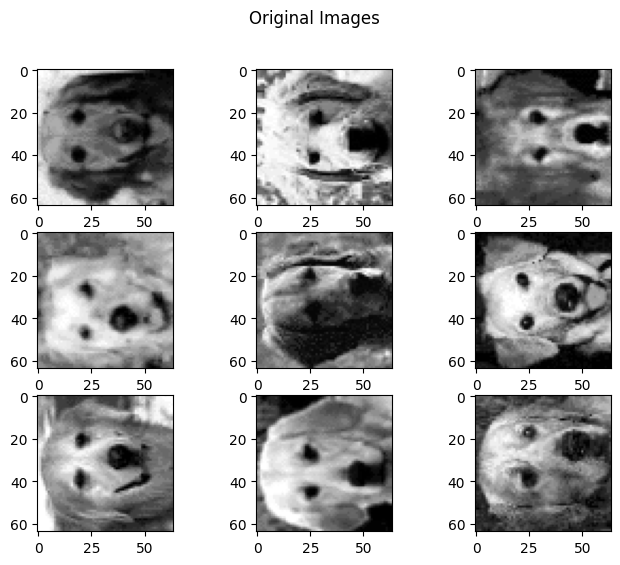

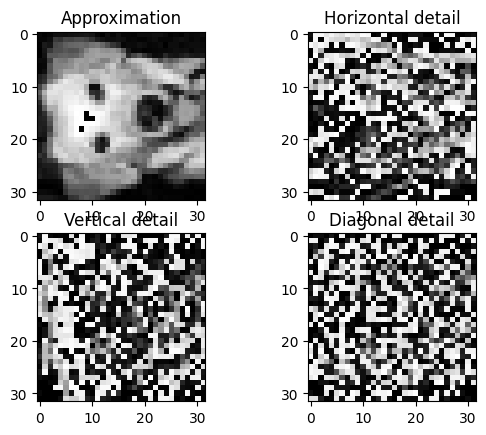

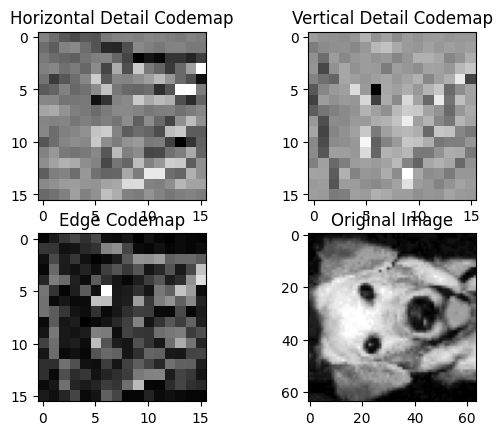

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import loadmat

# Load data
dog_data = loadmat('dogData.mat')
dog = dog_data['dog']

# Plot original images
plt.figure(figsize=(8, 6))
for j in range(9):
    plt.subplot(3, 3, j + 1)
    dog1 = np.reshape(dog[:, j], (64, 64))
    plt.imshow(dog1, cmap='gray')
plt.suptitle('Original Images')

# Wavelet transform for the 6th image
X = np.double(np.reshape(dog[:, 5], (64, 64)))
cA, (cH, cV, cD) = pywt.dwt2(X, 'haar')

# Plot wavelet coefficients
plt.figure(2)
plt.subplot(2, 2, 1)
plt.imshow(np.uint8(cA / np.max(cA) * 256), cmap='gray')
plt.title('Approximation')
plt.subplot(2, 2, 2)
plt.imshow(np.uint8(cH / np.max(cH) * 256), cmap='gray')
plt.title('Horizontal detail')
plt.subplot(2, 2, 3)
plt.imshow(np.uint8(cV / np.max(cV) * 256), cmap='gray')
plt.title('Vertical detail')
plt.subplot(2, 2, 4)
plt.imshow(np.uint8(cD / np.max(cD) * 256), cmap='gray')
plt.title('Diagonal detail')

# Create wavelet coefficient codemaps
nbcol = plt.cm.gray.N
cod_cH1 = pywt.wavedec2(cH, 'haar', level=1)
cod_cV1 = pywt.wavedec2(cV, 'haar', level=1)
cod_edge = np.abs(cod_cH1[0]) + np.abs(cod_cV1[0])

# Plot wavelet coefficient codemaps
plt.figure(3)
plt.subplot(2, 2, 1)
plt.imshow(cod_cH1[0], cmap='gray')
plt.title('Horizontal Detail Codemap')
plt.subplot(2, 2, 2)
plt.imshow(cod_cV1[0], cmap='gray')
plt.title('Vertical Detail Codemap')
plt.subplot(2, 2, 3)
plt.imshow(cod_edge, cmap='gray')
plt.title('Edge Codemap')
plt.subplot(2, 2, 4)
plt.imshow(np.reshape(dog[:, 5], (64, 64)), cmap='gray')
plt.title('Original Image')

plt.show()


In [14]:
dog_data = loadmat('dogData_w.mat')
dog_wave = dog_data['dog_wave']
cat_data = loadmat('catData_w.mat')
cat_wave = cat_data['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T


print(u.shape)



(1024, 160)


82.5


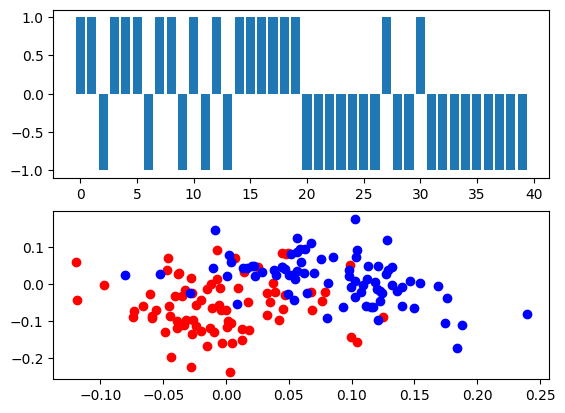

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

xtrain = np.concatenate((v[:60,np.array([1,3])],v[80:140,np.array([1,3])]))
label = np.repeat(np.array([1,-1]),60)
test = np.concatenate((v[60:80,np.array([1,3])],v[140:160,np.array([1,3])]))

lda = LinearDiscriminantAnalysis()
test_class = lda.fit(xtrain, label).predict(test)

truth = np.repeat(np.array([1,-1]),20)
E = 100*(1-np.sum(0.5*np.abs(test_class - truth))/40)
print(E)

fig,axs = plt.subplots(2)
axs[0].bar(range(40),test_class)

axs[1].plot(v[:80,1],v[:80,3],'ro')
axs[1].plot(v[80:,1],v[80:,3],'bo')

plt.show()



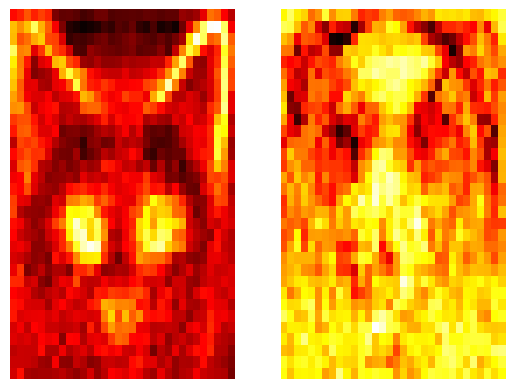

In [23]:
fig,axs = plt.subplots(1,2)
for j in range(2):
    U3 = np.flipud(np.reshape(u[:,2*j+1],(32,32)))
    axs[j].pcolor(np.rot90(U3),cmap='hot')
    axs[j].axis('off')